In [1]:
# for basic operations
import numpy as np
import pandas as pd

# for basic visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cd

C:\Users\MAYUR


In [3]:
cd Downloads

C:\Users\MAYUR\Downloads


In [4]:
data = pd.read_csv('amazon_alexa.tsv',delimiter='\t')

# getting the shape of the data
data.shape

(3150, 5)

In [5]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [6]:
# describing the data set
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [7]:
# checking if there is any null data or not

data.isnull().any()

rating              False
date                False
variation           False
verified_reviews    False
feedback            False
dtype: bool

In [8]:
data['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

In [9]:
data['length'] = data['verified_reviews'].apply(len)
data.groupby('length').describe().sample(10)

rating                                                feedback       \
        count      mean       std  min   25%  50%   75%  max    count mean   
length                                                                       
268       3.0  5.000000  0.000000  5.0  5.00  5.0  5.00  5.0      3.0  1.0   
151       5.0  4.800000  0.447214  4.0  5.00  5.0  5.00  5.0      5.0  1.0   
230       1.0  4.000000       NaN  4.0  4.00  4.0  4.00  4.0      1.0  1.0   
661       1.0  1.000000       NaN  1.0  1.00  1.0  1.00  1.0      1.0  0.0   
143       7.0  4.571429  0.534522  4.0  4.00  5.0  5.00  5.0      7.0  1.0   
194       4.0  3.000000  2.309401  1.0  1.00  3.0  5.00  5.0      4.0  0.5   
459       1.0  3.000000       NaN  3.0  3.00  3.0  3.00  3.0      1.0  1.0   
438       2.0  2.500000  2.121320  1.0  1.75  2.5  3.25  4.0      2.0  0.5   
698       2.0  4.000000  0.000000  4.0  4.00  4.0  4.00  4.0      2.0  1.0   
116      10.0  4.100000  1.523884  1.0  3.50  5.0  5.00  5.0     10.0  0.8   

                                             
             std  min   25%  50%   75%  max  
length                                       
268     0.000000  1.0  1.00  1.0  1.00  1.0  
151     0.000000  1.0  1.00  1.0  1.00  1.0  
230          NaN  1.0  1.00  1.0  1.00  1.0  
661          NaN  0.0  0.00  0.0  0.00  0.0  
143     0.000000  1.0  1.00  1.0  1.00  1.0  
194     0.577350  0.0  0.00  0.5  1.00  1.0  
459          NaN  1.0  1.00  1.0  1.00  1.0  
438     0.707107  0.0  0.25  0.5  0.75  1.0  
698     0.000000  1.0  1.00  1.0  1.00  1.0  
116     0.421637  0.0  1.00  1.0  1.00  1.0

## Data Visualizations

In [10]:
ratings = data['rating'].value_counts()

In [11]:
ratings

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

In [12]:
ratings.index

Int64Index([5, 4, 1, 3, 2], dtype='int64')

In [13]:
label_rating = ratings.index

In [14]:
size_rating = ratings.values
size_rating 

array([2286,  455,  161,  152,   96], dtype=int64)

In [15]:
label_rating

Int64Index([5, 4, 1, 3, 2], dtype='int64')

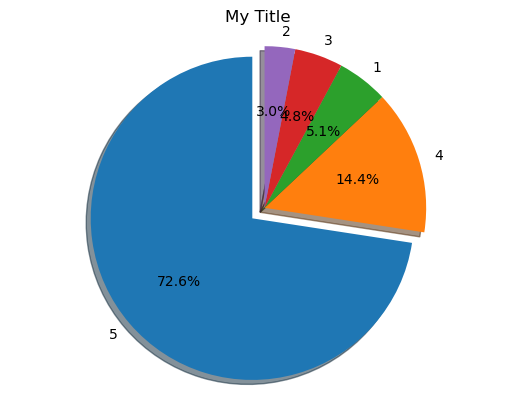

In [16]:
explode = [0.1,0,0,0,0]
plt.pie(size_rating,labels=label_rating,autopct='%1.1f%%',shadow=True, startangle=90,explode=explode)
plt.title('My Title')
plt.axis('equal')
plt.show()

<AxesSubplot:>

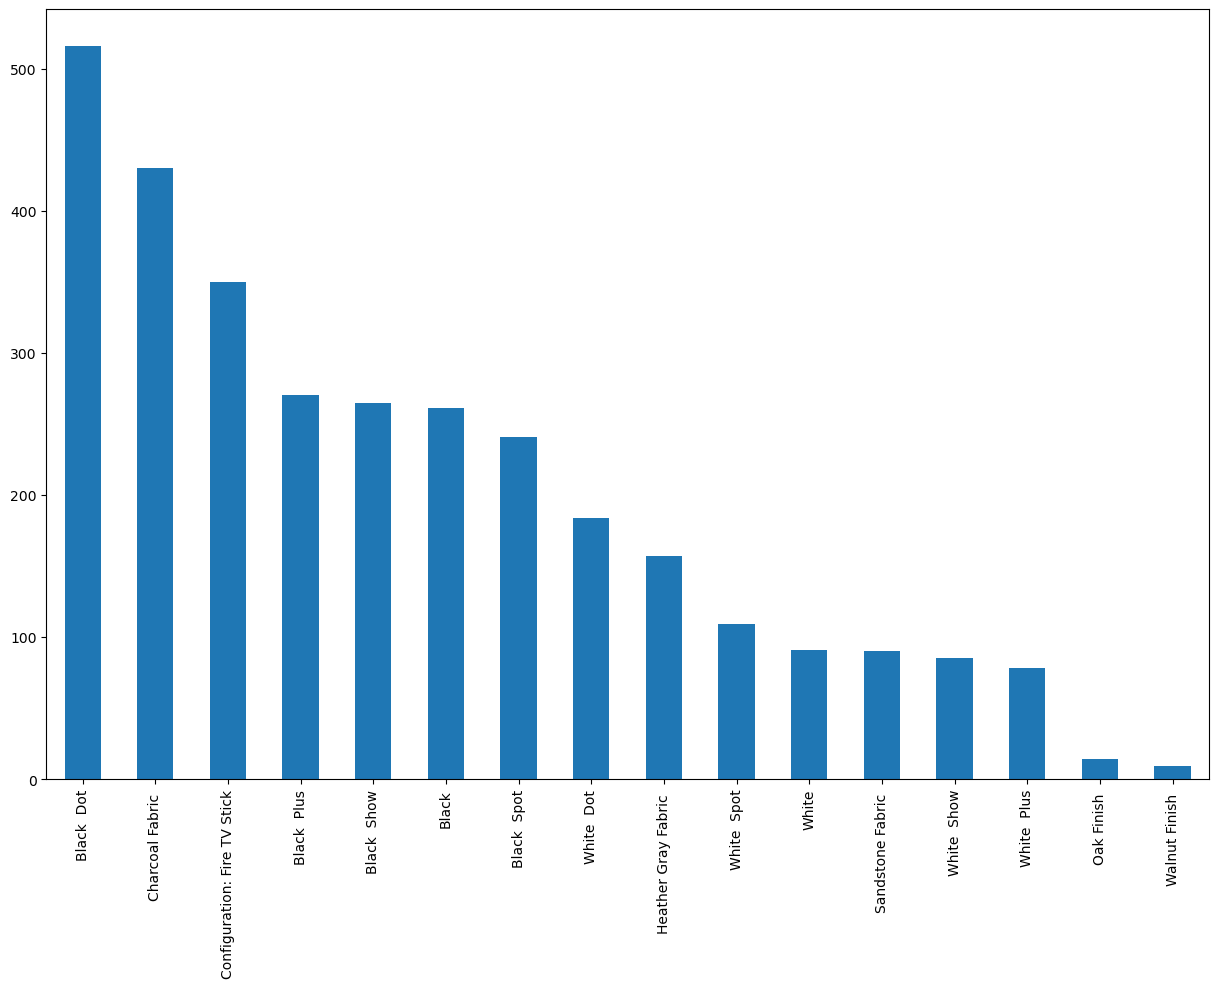

In [17]:
data['variation'].value_counts().plot.bar(figsize=(15,10))

In [18]:
data[data['length'] == 1]['verified_reviews'].iloc[0]

'😍'

In [19]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.verified_reviews)
sum_words = words.sum(axis=0)


In [20]:
sum_words

matrix([[4, 1, 1, ..., 1, 1, 1]], dtype=int64)

In [21]:

words_freq = [(word, sum_words[0, a]) for word, a in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])


In [22]:
frequency

,word,freq
0,love,956
1,echo,839
2,great,729
3,alexa,632
4,music,540
...,...,...
3779,scratch,1
3780,traveling,1
3781,ban,1
3782,installs,1


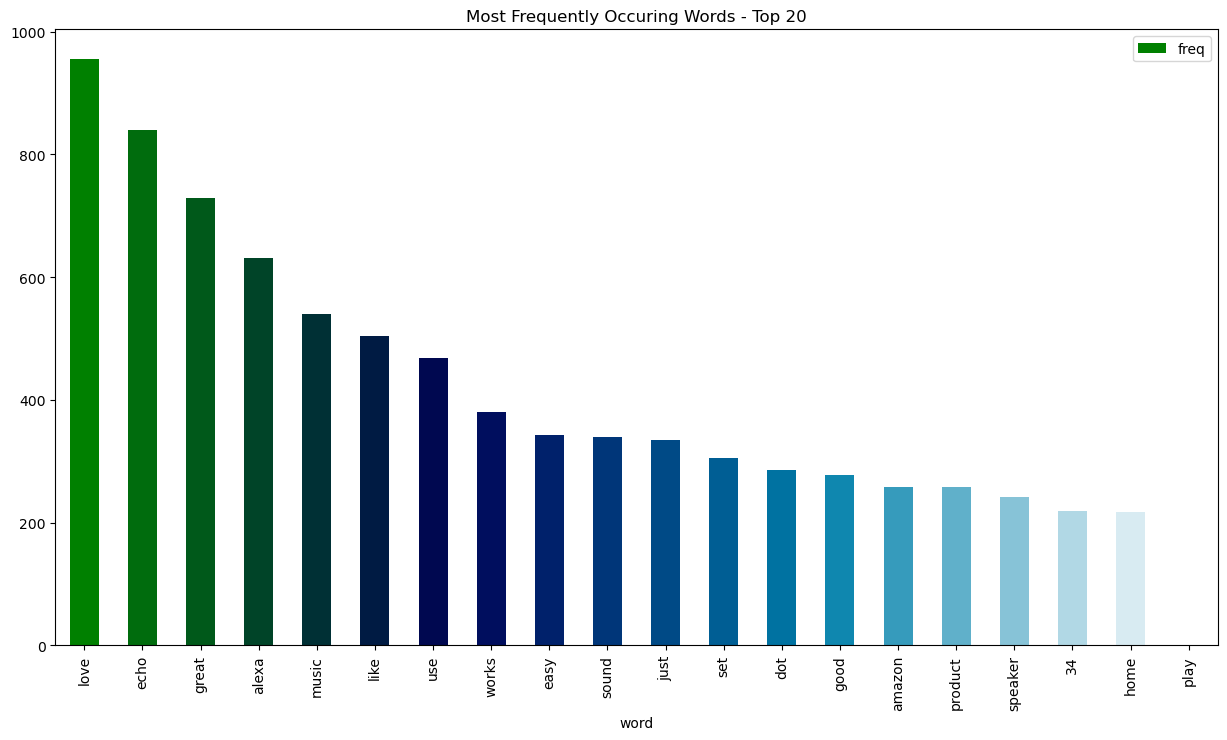

In [23]:
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot.bar(x='word', y='freq',color=color,figsize=(15,8))
plt.title("Most Frequently Occuring Words - Top 20")
plt.show()

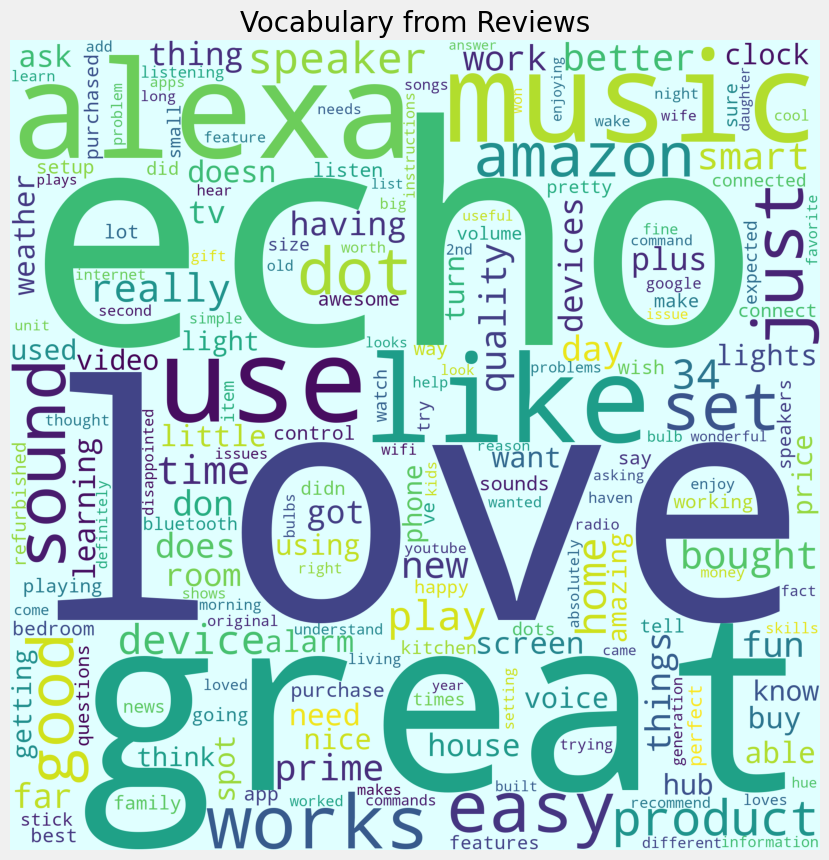

In [24]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'lightcyan', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from Reviews", fontsize = 20)
plt.show()

Text Cleaning

In [25]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MAYUR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
data.shape[0]

3150

In [27]:
corpus = []


for i in range (0, data.shape[0]):
    review = re.sub('[^a-zA-Z]',' ', data['verified_reviews'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)


In [28]:
re.sub('[^a-zA-Z]',' ', data['verified_reviews'][77])

'The speaker has excellent sound and works perfectly '

In [29]:
corpus

['love echo',
 'love',
 'sometim play game answer question correctli alexa say got wrong answer like abl turn light away home',
 'lot fun thing yr old learn dinosaur control light play game like categori nice sound play music well',
 'music',
 'receiv echo gift need anoth bluetooth someth play music easili access found smart speaker wait see els',
 'without cellphon cannot use mani featur ipad see use great alarm u r almost deaf hear alarm bedroom live room reason enough keep fun ask random question hear respons seem smartbon polit yet',
 'think th one purchas work get one everi room hous realli like featur offer specifili play music echo control light throughout hous',
 'look great',
 'love listen song heard sinc childhood get news weather inform great',
 'sent year old dad talk constantli',
 'love learn knew thing eveyday still figur everyth work far easi use understand make laugh time',
 'purchas mother knee problem give someth tri come get around fast like enjoy littl big thing ale

In [30]:
from sklearn.feature_extraction.text  import TfidfVectorizer

cv = CountVectorizer(max_features = 2500,stop_words = 'english')
x = cv.fit_transform(corpus).toarray()
y = data.iloc[:,-2].values


In [31]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [32]:
print(x.shape)
print(y.shape)

(3150, 2500)
(3150,)


In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2205, 2500)
(2205,)
(945, 2500)
(945,)


In [34]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

In [35]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9941043083900227
Testing Accuracy : 0.9375661375661376
[[ 21  54]
 [  5 865]]


In [37]:
# applying k fold cross validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.9347017688194159
Standard Variance : 0.009909645697194555


In [38]:
params = {
    'bootstrap': [True,False],
    'max_depth': [80, 90,100,110],
    'min_samples_split': [8,9,10,11,12],
    'n_estimators': [100, 300]
}

In [39]:
# applying grid search with stratified folds

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

cv_object = StratifiedKFold(n_splits = 2)

grid = GridSearchCV(estimator = model, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)
grid.fit(x_train, y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [80, 90, 100, 110],
                         'min_samples_split': [8, 9, 10, 11, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [40]:
print("Best Parameter Combination : {}".format(grid.best_params_))

Best Parameter Combination : {'bootstrap': False, 'max_depth': 110, 'min_samples_split': 8, 'n_estimators': 100}


In [41]:
model =RandomForestClassifier(
    n_estimators=100,
    max_depth=110,
    min_samples_split=8,
    bootstrap=True,
)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=110, min_samples_split=8)

In [42]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
y_pred = model.predict(x_test)

In [44]:
grid.cv_results_['mean_train_score'].mean()

0.9785333330316757

In [45]:
print("Mean Cross Validation Accuracy - Train Set : {}".format(grid.cv_results_['mean_train_score'].mean()*100))
print("Mean Cross Validation Accuracy - Validation Set : {}".format(grid.cv_results_['mean_test_score'].mean()*100))

from sklearn.metrics import accuracy_score
print("Accuracy Score for Test Set :", accuracy_score(y_test, y_pred))



Mean Cross Validation Accuracy - Train Set : 97.85333330316757
Mean Cross Validation Accuracy - Validation Set : 92.63876422658548
Accuracy Score for Test Set : 0.9322751322751323
